# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.


Shape: (976, 14)
   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

   No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0             1                 5    diesel      7-Speed         Automatic   
1             1                 5    petrol      5-Speed            Manual   
2             2                 5    petrol      5-Speed            Manual   
3             1                 5    petrol      5-Speed            Manual   
4             1                 5    petrol      5-Speed            Manual   

    Price  Price_ihs  Mileage_Run_ihs  
0  657000  14.088586        11.398883  
1

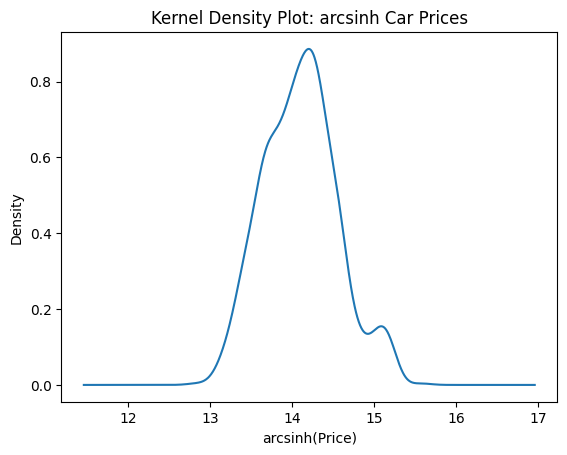

Price Summary by Make:
               count       mean       std        min        25%        50%  \
Make                                                                         
Chevrolet        6.0  13.613042  0.480975  13.188151  13.261539  13.445433   
Datsun           3.0  13.269194  0.036311  13.232114  13.251449  13.270783   
Ford            52.0  14.161427  0.210895  13.270783  14.054527  14.162640   
Honda           73.0  14.229465  0.336972  13.356645  13.965653  14.266586   
Hyundai        305.0  14.061658  0.398781  13.114331  13.785051  14.059241   
Jeep             4.0  14.909738  0.105084  14.763300  14.876417  14.933413   
Kia              8.0  14.985324  0.076877  14.822738  14.965389  14.996253   
MG Motors       35.0  15.132199  0.066263  14.971763  15.088892  15.122762   
Mahindra        18.0  14.592100  0.159906  14.280502  14.544955  14.598828   
Maruti Suzuki  293.0  13.911280  0.371409  13.068963  13.619496  13.868103   
Nissan           4.0  14.334341  0.392610

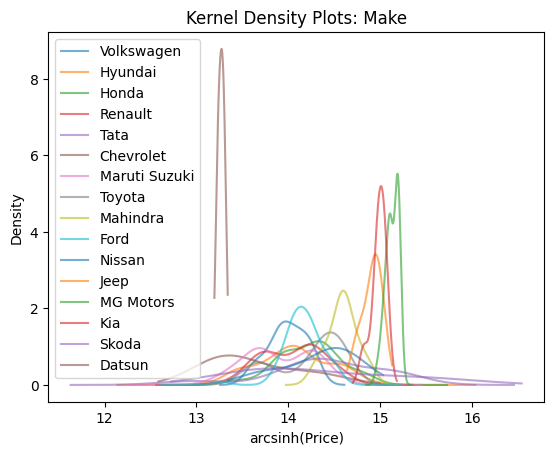

Overall Mileage Summary:
count    976.000000
mean      11.109435
std        0.733389
min        7.711549
25%       10.722241
50%       11.227119
75%       11.651317
max       12.201010
Name: Mileage_Run_ihs, dtype: float64


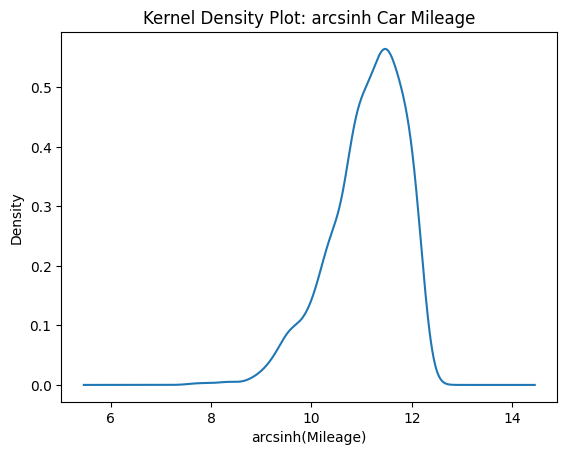

Mileage Summary by Make:
               count       mean       std        min        25%        50%  \
Make                                                                         
Chevrolet        6.0  13.613042  0.480975  13.188151  13.261539  13.445433   
Datsun           3.0  13.269194  0.036311  13.232114  13.251449  13.270783   
Ford            52.0  14.161427  0.210895  13.270783  14.054527  14.162640   
Honda           73.0  14.229465  0.336972  13.356645  13.965653  14.266586   
Hyundai        305.0  14.061658  0.398781  13.114331  13.785051  14.059241   
Jeep             4.0  14.909738  0.105084  14.763300  14.876417  14.933413   
Kia              8.0  14.985324  0.076877  14.822738  14.965389  14.996253   
MG Motors       35.0  15.132199  0.066263  14.971763  15.088892  15.122762   
Mahindra        18.0  14.592100  0.159906  14.280502  14.544955  14.598828   
Maruti Suzuki  293.0  13.911280  0.371409  13.068963  13.619496  13.868103   
Nissan           4.0  14.334341  0.3926

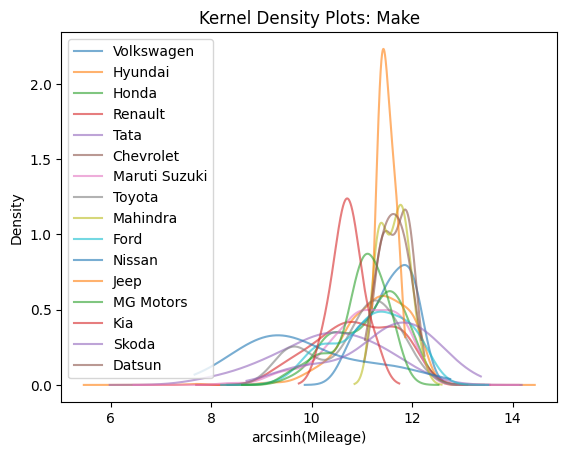

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

url = 'https://raw.githubusercontent.com/ds4e/linearModels/refs/heads/main/lab/data/cars_hw.csv'
df = pd.read_csv(url)

#cleaning
df["No_of_Owners"] = df["No_of_Owners"].str.replace("st|nd|rd|th", "", regex=True).astype(int)
df.drop_duplicates(inplace=True)

df['Price_ihs'] = np.arcsinh(df['Price'])
df['Mileage_Run_ihs'] = np.arcsinh(df['Mileage_Run'])

print("Shape:", df.shape)
print(df.head())

#EDA of price
p_summary = df["Price_ihs"].describe()
print("Overall Price Summary:")
print(p_summary)

plt.figure()
df["Price_ihs"].plot(kind="density")
plt.title("Kernel Density Plot: arcsinh Car Prices")
plt.xlabel("arcsinh(Price)")
plt.ylabel("Density")
plt.show()

make_price_summary = df.groupby("Make")["Price_ihs"].describe()
print("Price Summary by Make:")
print(make_price_summary)

plt.figure()
for make in df["Make"].unique():
    subset = df[df["Make"] == make]
    subset["Price_ihs"].plot(kind="density", label=make, alpha=0.6)
plt.title("Kernel Density Plots: Make")
plt.xlabel("arcsinh(Price)")
plt.ylabel("Density")
plt.legend()
plt.show()

#EDA of mileage
m_summary = df["Mileage_Run_ihs"].describe()
print("Overall Mileage Summary:")
print(m_summary)

plt.figure()
df["Mileage_Run_ihs"].plot(kind="density")
plt.title("Kernel Density Plot: arcsinh Car Mileage")
plt.xlabel("arcsinh(Mileage)")
plt.ylabel("Density")
plt.show()

make_mileage_summary = df.groupby("Make")["Mileage_Run_ihs"].describe()
print("Mileage Summary by Make:")
print(make_price_summary)

plt.figure()
for make in df["Make"].unique():
    subset = df[df["Make"] == make]
    subset["Mileage_Run_ihs"].plot(kind="density", label=make, alpha=0.6)
plt.title("Kernel Density Plots: Make")
plt.xlabel("arcsinh(Mileage)")
plt.ylabel("Density")
plt.legend()
plt.show()

2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.


3. Implement an ~80/~20 train-test split. Put the test data aside.


4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?


5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?


6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?


7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?


8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.